# # Content <a id="content"> </a>
- [Introduction](#introduction)
- [Dataset Inspection](#dataset-inspection)
    - [Dataset Description](#dataset-description)
- [Data Cleaning and Preprocessing](#data-cleaning)
    - [Convert Data Type of a Column](#convert-column)
    - [Feature Engineering](#FeatureEngineering)
    - [Remove Outliers](#remove-outliers)
- [Exploratory Data Analysis](#eda)
    - [Visualization](#visualization)
- [Transform Data](#transform-data)
    - [Create Dummy Value](#dummy)
- [Model Building](#model)
    - [Cross Validation](#cross-validation)
    - [XGBoost Model](#xgboost)
- [Car Price Prediction](#prediction)

# # Introduction <a id = "introduction"> </a>
---
**Main Objectives on this Project:** 
- Predicting car prices using regression analysis involves employing various methods such as Linear Regression, Lasso Regression, Decision Tree Regression, and XGBoost. Each regression model should undergo cross-validation to determine the most effective one.

- To begin, an exploratory data analysis (EDA) is conducted to understand the dataset. Subsequently, Linear Regression, Lasso Regression, Decision Tree Regression, and XGBoost models are applied, and their performance is evaluated using cross-validation techniques. The model that demonstrates the best performance in terms of accuracy and generalization is then selected.

- Once the optimal regression model is identified, it can be implemented on a website to provide users with an easy tool for predicting car prices. This website would leverage the chosen regression model to make predictions based on user input, offering a user-friendly interface for car price estimation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib

from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

# # Dataset Inspection <a id="dataset-inspection"> </a> 
[Go Content](#content) 

---

In [2]:
df1 = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

print("Shape:", df1.shape)
df1.sample(5)

Shape: (19237, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1840,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
13365,45730491,41221,730,SSANGYONG,Actyon,2016,Jeep,Yes,Diesel,1.6,60650 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
15642,45782470,8154,-,HONDA,FIT,2005,Sedan,No,Petrol,1.5,223000 km,4.0,Tiptronic,Front,04-May,Right-hand drive,Grey,5
14385,45757493,2274,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
18273,45756853,1568,382,FORD,Fusion,2015,Sedan,Yes,Hybrid,2,107166 km,4.0,Automatic,Front,04-May,Left wheel,White,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### # Dataset Description <a id="dataset-description"> </a>
Here's a brief description for each of the attributes in this dataset:

1. **ID:** An identifier for each entry in the dataset. It's typically a unique value assigned to each record.

2. **Price (Target Column):** The price of the car, which is the target variable you want to predict in a machine learning context.

3. **Levy:** The amount of tax or fee imposed on the car. It could be associated with the registration or ownership of the vehicle.

4. **Manufacturer:** The company or brand that produced the car.

5. **Model:** The specific model name or designation of the car produced by the manufacturer.

6. **Prod. year:** The year in which the car was manufactured or produced.

7. **Category:** The category or type of the car, which could include designations like sedan, SUV, coupe, etc.

8. **Leather interior:** A binary indicator (yes/no) specifying whether the car has a leather interior.

9. **Fuel type:** The type of fuel the car uses, such as gasoline, diesel, hybrid, electric, etc.

10. **Engine volume:** The size of the car's engine, usually measured in liters or cubic centimeters.

11. **Mileage:** The total distance the car has traveled, often measured in kilometers or miles.

12. **Cylinders:** The number of cylinders in the car's engine.

13. **Gear box type:** The type of transmission the car has, such as automatic, manual, or semi-automatic.

14. **Drive wheels:** The configuration of wheels responsible for powering the car (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).

15. **Doors:** The number of doors on the car.

16. **Wheel:** The type of wheel configuration, such as left-hand drive (LHD) or right-hand drive (RHD).

17. **Color:** The exterior color of the car.

18. **Airbags:** The number of airbags in the car, which are safety features designed to protect occupants in the event of a collision.


In [4]:
df1.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
# Count the Unique value for each of the columns
df1.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

- **Check some unique column values**

In [6]:
df1['Engine volume'].unique()[:20]

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo'], dtype=object)

In [7]:
df1['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [8]:
df1['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

# # Data Cleaning and Preprocessing <a id="data-cleaning"> </a>
[Go Content](#content)

---

In [9]:
# Remove unnecessary Columns
df2 = df1.drop(["ID", "Model"], axis="columns")

In [10]:
# Drop Duplicates
print("Duplicates:", df2.duplicated().sum())
df2.drop_duplicates(inplace=True)

Duplicates: 3530


In [11]:
# Replace the Levy Column with 0 Value
df2['Levy'] = df2['Levy'].replace("-", 0)
df2.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
df2['Doors'] = df2['Doors'].replace(">5", np.nan)

In [13]:
# Count the NAN value for each of the columns
df2.isna().sum()

Price                 0
Levy                  0
Manufacturer          0
Prod. year            0
Category              0
Leather interior      0
Fuel type             0
Engine volume         0
Mileage               0
Cylinders             0
Gear box type         0
Drive wheels          0
Doors               124
Wheel                 0
Color                 0
Airbags               0
dtype: int64

In [14]:
# Drop NAN value
df2.dropna(inplace=True)

## # Convert Data Type of a Column <a id="convert-column"></a>
[Go Content](#content)

---

In [15]:
df3 = df2.copy()

# Remove String value from Engine Volume column
df3['Engine volume'] = df3['Engine volume'].apply(lambda x: x.split(" ")[0])
df3['Engine volume'].unique()[:20]

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0', '2.2', '4.7', '1.5', '4.4', '3.0', '1.4', '3.6', '2.3',
       '5.5'], dtype=object)

In [16]:
# Remove string value from Mileage
df3['Mileage'] = df3['Mileage'].str.replace("km", "")
df3['Mileage'][:5]

0    186005 
1    192000 
2    200000 
3    168966 
4     91901 
Name: Mileage, dtype: object

In [17]:
# Convert the Wheel column to 1 and 0
df3['Left wheel'] = df3['Wheel'].apply(lambda x: 1 if x == "Left wheel" else 0)
df4 = df3.drop("Wheel", axis="columns")
df4.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Left wheel
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Silver,12,1
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Black,8,1
2,8467,0,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Black,2,0
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,White,0,1
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Silver,4,1


In [18]:
df4['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [19]:
# Replace the Drive Wheels column value
df4['Drive wheels'] = df4['Drive wheels'].str.replace("4x4", "All")

In [20]:
df4['Leather interior'] = df4['Leather interior'].apply(lambda x: 1 if x == "Yes" else 0)
df4.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Left wheel
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,All,04-May,Silver,12,1
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,All,04-May,Black,8,1
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,04-May,Black,2,0
3,3607,862,FORD,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,All,04-May,White,0,1
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Silver,4,1


In [21]:
df4['Doors'] = df4['Doors'].apply(lambda x: int(x.split("-")[0]))
df4['Doors'].unique()

array([4, 2])

In [22]:
df4['Four doors'] = df4['Doors'].apply(lambda x: 1 if x == 4 else 0)
df5 = df4.drop("Doors", axis="columns")
df5.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,All,Silver,12,1,1
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,All,Black,8,1,1
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,Black,2,0,1
3,3607,862,FORD,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,All,White,0,1,1
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,Silver,4,1,1


In [23]:
# Convert the data types
df5['Levy'] = df5['Levy'].apply(lambda x: int(x))
df5['Engine volume'] = df5['Engine volume'].apply(lambda x: float(x))
df5['Mileage'] = df5['Mileage'].apply(lambda x: int(x))
df5['Cylinders'] = df5['Cylinders'].apply(lambda x: int(x))

In [24]:
df5.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Prod. year            int64
Category             object
Leather interior      int64
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Color                object
Airbags               int64
Left wheel            int64
Four doors            int64
dtype: object

In [25]:
df6 = df5.copy()

# # Feature Engineering <a id="FeatureEngineering"> </a>
[Go Content](#content)

---

In [26]:
df6.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,All,Silver,12,1,1
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,All,Black,8,1,1
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Black,2,0,1
3,3607,862,FORD,2011,Jeep,1,Hybrid,2.5,168966,4,Automatic,All,White,0,1,1
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,Silver,4,1,1


- **Convert Unnecessary Manufacturer to Others**

In [27]:
manufacturer_cars = df6['Manufacturer'].value_counts()
manufacturer_cars_less_than_100 = manufacturer_cars[manufacturer_cars < 100]
len(manufacturer_cars_less_than_100)

47

In [28]:
df6['Manufacturer'] = df6['Manufacturer'].apply(lambda x: "OTHERS" if x in manufacturer_cars_less_than_100 else x) 
df6['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3039
TOYOTA           2831
MERCEDES-BENZ    1428
CHEVROLET         965
FORD              939
BMW               913
HONDA             874
OTHERS            846
NISSAN            587
VOLKSWAGEN        552
SSANGYONG         415
LEXUS             415
KIA               409
OPEL              390
MITSUBISHI        287
SUBARU            227
AUDI              191
MAZDA             139
JEEP              136
Name: count, dtype: int64

In [29]:
# Create a new car age column
from datetime import datetime
current_year = datetime.now().year
print("Current Year:", current_year)

df6['Age'] = current_year -  df6['Prod. year']
df6.head()

Current Year: 2024


,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,All,Silver,12,1,1,14
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,All,Black,8,1,1,13
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Black,2,0,1,18
3,3607,862,FORD,2011,Jeep,1,Hybrid,2.5,168966,4,Automatic,All,White,0,1,1,13
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,Silver,4,1,1,10


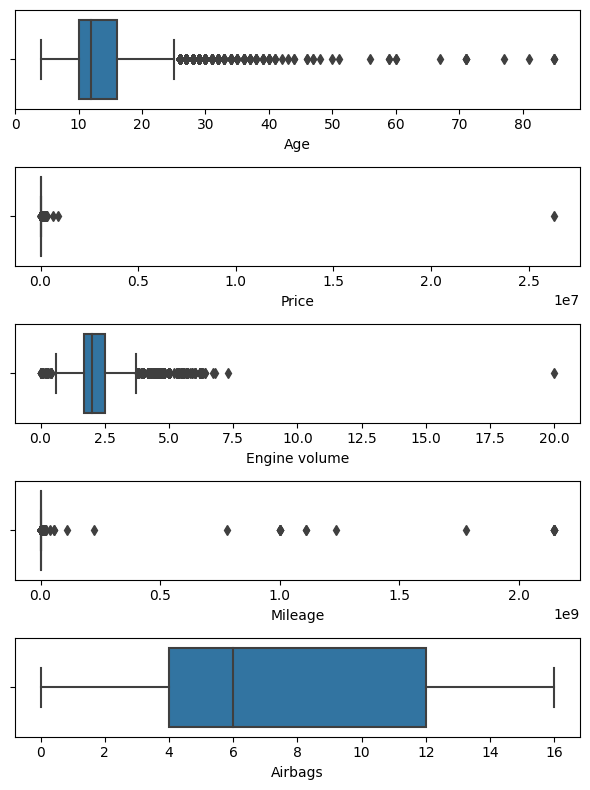

In [30]:
# View outliers using bloxplot
fig, axes = plt.subplots(5, 1, figsize=(6,8))

# Plot boxplots using Seaborn
sns.boxplot(x=df6['Age'], ax=axes[0])
sns.boxplot(x=df6['Price'], ax=axes[1])
sns.boxplot(x=df6['Engine volume'], ax=axes[2])
sns.boxplot(x=df6['Mileage'], ax=axes[3])
sns.boxplot(x=df6['Airbags'], ax=axes[4])

plt.tight_layout()
plt.show()

In [31]:
# Remove Extreme price value
price_condition = df6['Price'] > 400000
display(df6[price_condition])
result_indices_price = df6.loc[price_condition].index
df6.drop(result_indices_price , inplace=True)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
1225,627220,0,MERCEDES-BENZ,2020,Jeep,1,Petrol,6.3,0,8,Tiptronic,All,Black,12,1,1,4
8541,872946,2067,OTHERS,2019,Universal,1,Petrol,4.0,2531,8,Tiptronic,All,Black,0,1,1,5
16983,26307500,0,OPEL,1999,Goods wagon,0,Diesel,1.7,99999,4,Manual,Front,Blue,0,1,0,25


In [32]:
# Remove Extreme Engine Volume Value
engine_volume_condition = df6['Engine volume'] > 10.0
display(df6[engine_volume_condition])
index_number = df6.loc[engine_volume_condition].index
df6.drop(index_number, inplace=True)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
2357,10036,5603,HYUNDAI,2014,Sedan,1,LPG,20.0,333686,4,Automatic,Front,Silver,4,1,1,10


In [33]:
# Remove Extreme Mileage Value
mileage_condition = df6['Mileage'] > 1000000
display(df6[mileage_condition].head())
index_number = df6.loc[mileage_condition].index
df6.drop(index_number, inplace=True)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
144,4300,0,MERCEDES-BENZ,1985,Universal,0,Diesel,2.5,1111111,4,Manual,Rear,Black,1,1,1,39
493,15994,777,TOYOTA,2014,Sedan,0,Petrol,2.5,1440000,4,Automatic,Front,Silver,0,1,1,10
985,2700,0,OPEL,1997,Sedan,0,CNG,1.6,777777777,4,Automatic,Front,Beige,2,1,1,27
1146,13485,0,BMW,2003,Sedan,1,Petrol,2.5,7777787,6,Manual,Rear,Silver,10,1,1,21
1404,9095,0,BMW,2002,Sedan,0,Petrol,2.8,55556665,6,Manual,Rear,Silver,6,1,1,22


# # Remove Outliers <a id="remove-outliers"></a>
[Go Content](#content)

---

In [34]:
# Remove price outliers
price_min_threshold, price_max_threshold = df6['Price'].quantile([0.15, 0.974])
df7 = df6[(df6['Price'] > price_min_threshold) & (df6['Price'] < price_max_threshold)]
display(df7.sort_values(by="Price", ascending=True))
print("df6 Rows:", df6.shape[0])
print("Total Rows Remove:", df6.shape[0] - df7.shape[0])

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
10160,3800,0,OPEL,2001,Hatchback,1,Petrol,2.6,219200,6,Automatic,Front,Black,6,0,1,23
4317,3800,0,OPEL,1994,Sedan,0,Petrol,1.6,270000,4,Manual,Front,Red,2,1,1,30
10665,3800,0,MERCEDES-BENZ,2000,Sedan,1,Diesel,3.2,1000,6,Tiptronic,Rear,Silver,6,1,1,24
3328,3800,0,OPEL,2001,Sedan,0,Petrol,1.0,184592,3,Manual,Front,Blue,4,1,1,23
14458,3800,0,OPEL,1997,Sedan,0,CNG,1.6,0,4,Manual,Front,Green,2,1,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16926,62408,1811,LEXUS,2010,Jeep,1,Petrol,4.6,133000,8,Tiptronic,All,Silver,10,1,1,14
8406,62493,831,HONDA,2018,Coupe,1,Petrol,1.5,8520,4,Automatic,Front,Red,4,1,1,6
12169,62653,1077,HYUNDAI,2019,Jeep,1,Diesel,2.0,7865,4,Automatic,Front,Brown,4,1,1,5
6329,62697,880,HYUNDAI,2018,Sedan,1,Petrol,1.6,32000,4,Automatic,Front,Grey,4,1,1,6


df6 Rows: 15509
Total Rows Remove: 2755


In [35]:
# Remove Engine volume outliers
ev_min_threshold, ev_max_threshold = df7['Engine volume'].quantile([0.007, 0.99])
df8 = df7[(df7['Engine volume'] > ev_min_threshold) & (df7['Engine volume'] < ev_max_threshold)]
display(df8.sort_values(by="Engine volume", ascending=True))
print("df7 Rows:", df7.shape[0])
print("Total Rows Remove:", df7.shape[0] - df8.shape[0])

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
8163,10976,0,TOYOTA,2008,Hatchback,0,Hybrid,1.1,220800,2,Variator,Front,Blue,4,1,1,16
15474,10976,0,KIA,2008,Hatchback,0,Petrol,1.1,91000,4,Manual,Front,Black,4,1,1,16
14962,9408,0,KIA,2005,Hatchback,0,Petrol,1.1,218000,4,Manual,Front,Black,4,1,1,19
7911,10349,0,OPEL,2008,Hatchback,0,Petrol,1.2,135000,4,Manual,Front,Brown,3,1,1,16
2987,10663,1032,NISSAN,2012,Hatchback,0,Petrol,1.2,181000,4,Automatic,Front,White,4,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,30734,0,BMW,2008,Jeep,1,Petrol,4.8,230000,12,Tiptronic,All,Black,12,1,1,16
19035,20385,0,BMW,2008,Sedan,1,Petrol,4.8,227000,8,Tiptronic,Rear,Black,8,1,1,16
11837,25089,0,BMW,2008,Sedan,1,Petrol,4.8,150000,8,Tiptronic,Rear,White,12,1,1,16
11103,8938,2195,BMW,2009,Jeep,1,Petrol,4.8,153515,8,Automatic,All,Grey,12,1,1,15


df7 Rows: 12754
Total Rows Remove: 301


In [36]:
# Remove Mileage outliers
Mileage_max_threshold = df7['Mileage'].quantile(0.975)
df9 = df8[(df8['Mileage'] < Mileage_max_threshold)]
display(df9.sort_values(by="Mileage", ascending=False).head())
print("df8 Rows:", df8.shape[0])
print("Total Rows Remove:", df8.shape[0] - df9.shape[0])

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
19093,6586,585,TOYOTA,2013,Sedan,1,Hybrid,1.8,361445,4,Automatic,Front,White,12,1,1,11
6928,9252,781,TOYOTA,2012,Sedan,1,Hybrid,2.5,361035,4,Automatic,Front,Black,12,1,1,12
8696,15200,586,TOYOTA,2012,Hatchback,0,Hybrid,1.8,360755,4,Automatic,Front,Sky blue,12,1,1,12
6335,58018,3505,LEXUS,2015,Jeep,1,Petrol,3.5,360125,6,Tiptronic,All,White,12,0,1,9
16801,10036,1832,MERCEDES-BENZ,2005,Goods wagon,0,Diesel,2.2,360000,4,Manual,Rear,Silver,4,1,1,19


df8 Rows: 12453
Total Rows Remove: 316


In [37]:
# Remove Age outliers
Age_max_threshold = df8['Age'].quantile(0.96)
df10 = df9[(df9['Age'] < Age_max_threshold)]
display(df10.sort_values(by="Age", ascending=False).head())
print("df9 Rows:", df9.shape[0])
print("Total Rows Remove:", df9.shape[0] - df10.shape[0])

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
4687,13485,0,MERCEDES-BENZ,2000,Sedan,1,Petrol,3.2,25500,4,Automatic,Rear,Black,6,1,1,24
14555,5959,0,VOLKSWAGEN,2000,Sedan,0,Diesel,1.9,0,4,Manual,Front,Silver,4,1,1,24
17798,8154,0,MERCEDES-BENZ,2000,Sedan,1,Diesel,2.7,290000,5,Automatic,Rear,Blue,12,1,1,24
600,7840,0,MERCEDES-BENZ,2000,Sedan,0,Petrol,2.0,136000,4,Tiptronic,Rear,Blue,6,0,1,24
2128,6272,0,SUBARU,2000,Jeep,0,CNG,2.0,200000,4,Automatic,All,White,4,0,1,24


df9 Rows: 12137
Total Rows Remove: 627


In [38]:
df = df10.drop('Age', axis="columns")

# # Exploratory Data Analysis <a id="eda"></a>
[Go Content](#content)

------

In [39]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,All,Silver,12,1,1
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,All,Black,8,1,1
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Black,2,0,1
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,Silver,4,1,1
5,39493,891,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,4,Automatic,Front,White,4,1,1


In [40]:
manufacturer = df.groupby('Manufacturer')
manufacturer['Manufacturer'].value_counts().sort_values(ascending=False)

Manufacturer
HYUNDAI          2527
TOYOTA           2184
MERCEDES-BENZ     818
CHEVROLET         781
HONDA             682
FORD              656
BMW               641
OTHERS            509
NISSAN            443
SSANGYONG         413
VOLKSWAGEN        387
KIA               337
LEXUS             243
MITSUBISHI        192
OPEL              190
SUBARU            176
AUDI              122
JEEP              108
MAZDA             101
Name: count, dtype: int64

In [41]:
df.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags,Left wheel,Four doors
count,11510.00000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000
mean,20267.17298,556.036838,2011.279583,0.661772,2.136968,123807.962207,4.383058,6.340313,0.904344,0.961338
std,12211.00072,491.597912,4.426285,0.473127,0.655949,73491.450180,0.990269,3.743050,0.294132,0.192797
min,3800.00000,0.000000,2000.000000,0.000000,1.100000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11403.00000,0.000000,2009.000000,0.000000,1.600000,69252.750000,4.000000,4.000000,1.000000,1.000000
50%,17249.00000,639.000000,2012.000000,1.000000,2.000000,118400.000000,4.000000,4.000000,1.000000,1.000000
75%,25089.00000,836.000000,2014.000000,1.000000,2.500000,169000.000000,4.000000,10.000000,1.000000,1.000000
max,62719.00000,7536.000000,2020.000000,1.000000,4.800000,361445.000000,16.000000,16.000000,1.000000,1.000000


In [42]:
# sns.pairplot(df)

In [43]:
correlation = df.select_dtypes(exclude="object").corr()
correlation['Price']

Price               1.000000
Levy                0.156967
Prod. year          0.488154
Leather interior    0.286973
Engine volume       0.187803
Mileage            -0.220853
Cylinders           0.061317
Airbags             0.028697
Left wheel          0.265832
Four doors          0.044941
Name: Price, dtype: float64

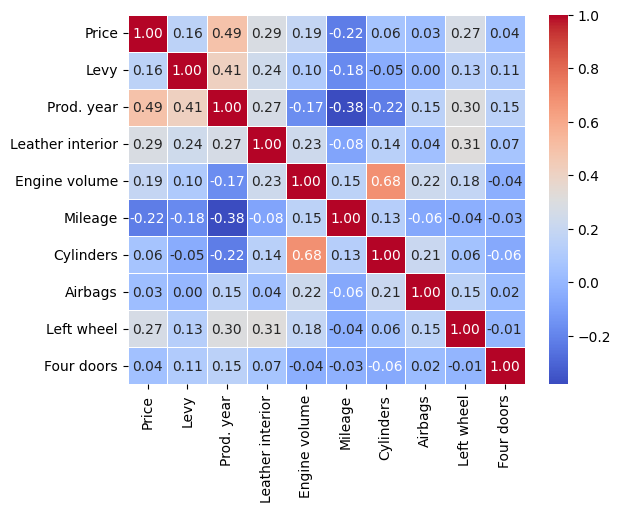

In [44]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

**Weak Correlation (Close to 0):**
'Cylinders,' 'Airbags,' 'Four doors,' and 'Levy' have relatively weak correlations with 'Price.' </br>
For this reason remove this value from our dataset. 

In [45]:
df = df.drop(['Cylinders', 'Airbags', 'Four doors', 'Levy'], axis="columns")
df.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Color,Left wheel
0,13328,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,Automatic,All,Silver,1
1,16621,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,All,Black,1
2,8467,HONDA,2006,Hatchback,0,Petrol,1.3,200000,Variator,Front,Black,0
4,11726,HONDA,2014,Hatchback,1,Petrol,1.3,91901,Automatic,Front,Silver,1
5,39493,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,Automatic,Front,White,1


# # Visualization <a id="visualization"> </a>
[Go Content](#content)
    
---

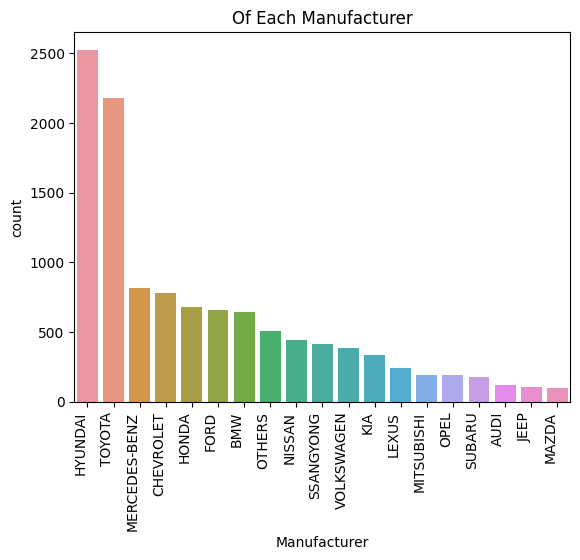

In [46]:
# Of Each Manufacturer
sns.countplot(data=df, x="Manufacturer", order=df['Manufacturer'].value_counts().index)
plt.xticks(rotation=90, ha="right")
plt.title("Of Each Manufacturer")
plt.show()

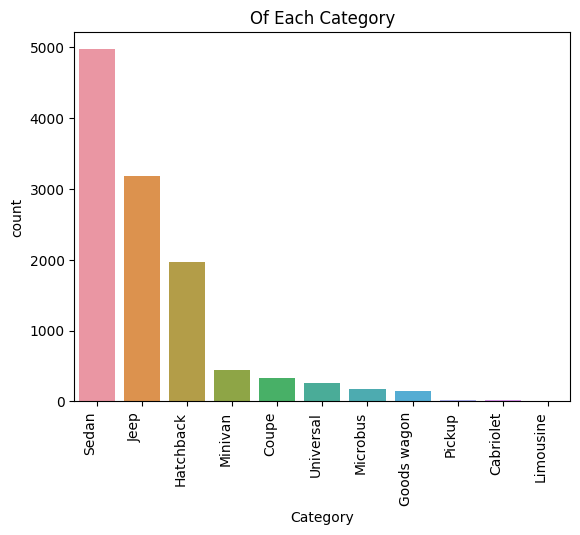

In [47]:
# Of Each Category
sns.countplot(data=df, x="Category", order=df['Category'].value_counts().index)
plt.xticks(rotation=90, ha="right")
plt.title("Of Each Category")
plt.show()

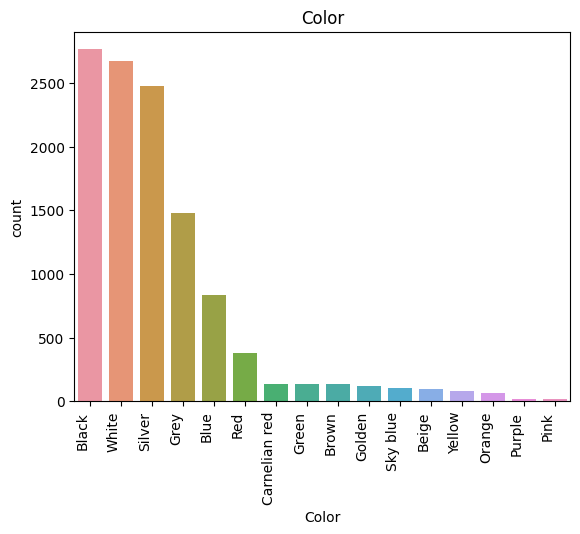

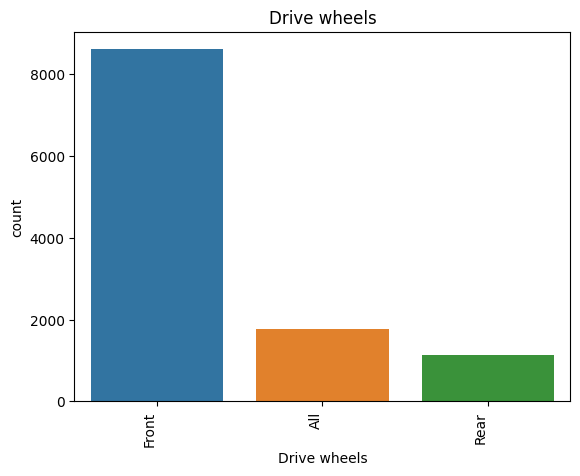

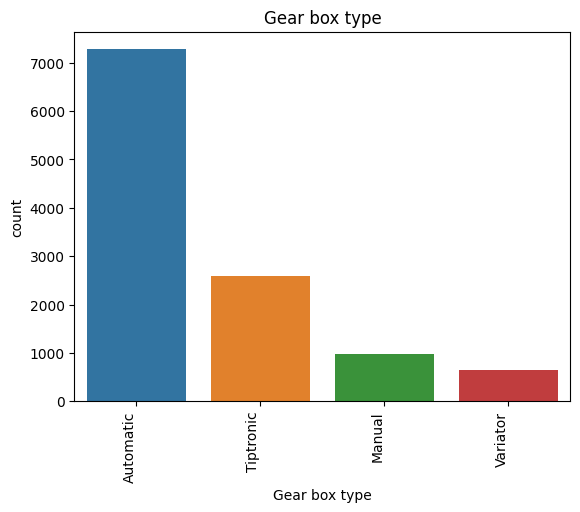

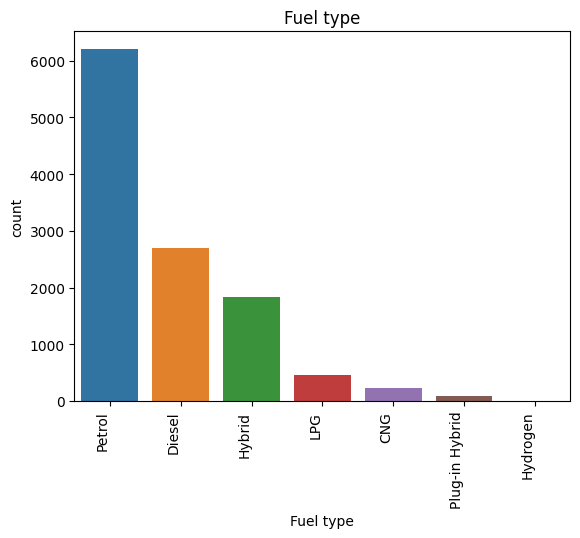

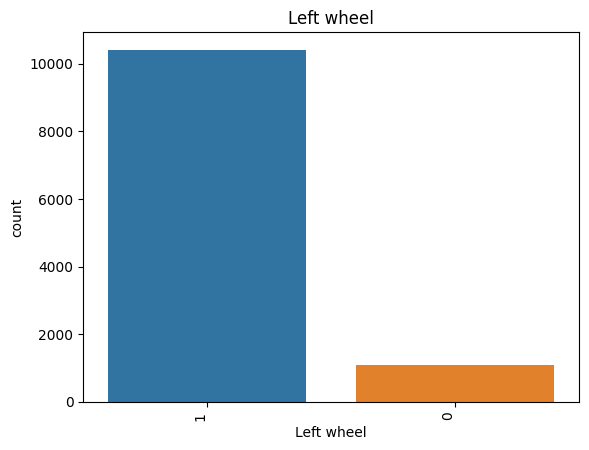

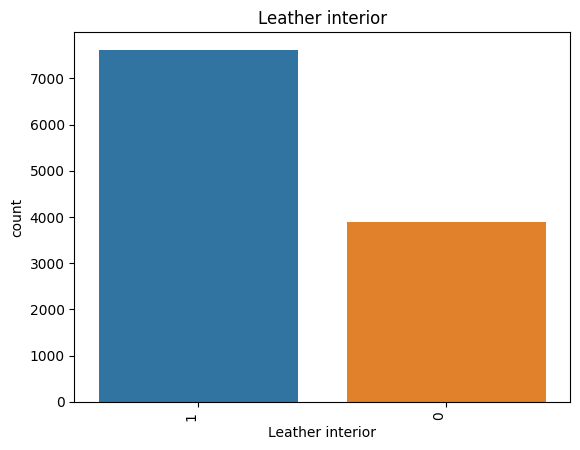

In [48]:
columns = ['Color', 'Drive wheels', 'Gear box type', 'Fuel type', 'Left wheel', 'Leather interior']
for column in columns:
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.xticks(rotation=90, ha="right")
    plt.title(column)
    plt.show()

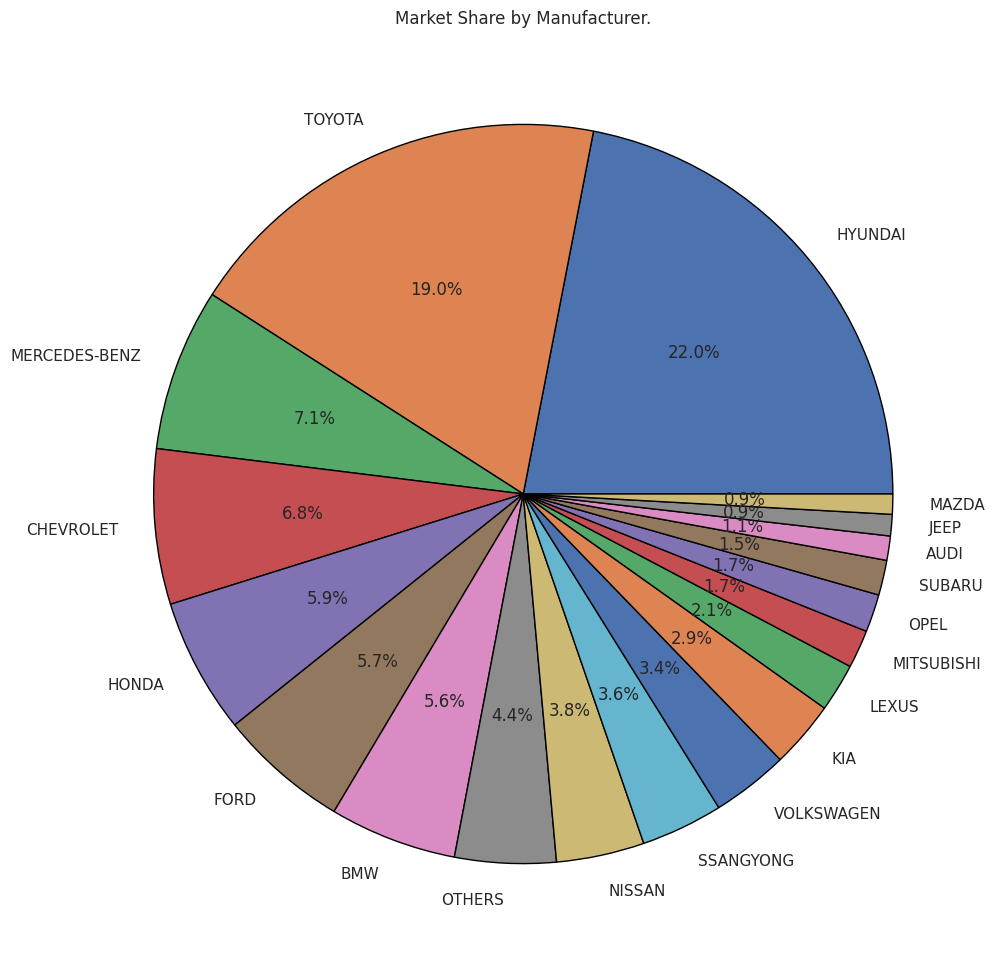

In [49]:
manufacturer_counts = df['Manufacturer'].value_counts()

# Draw a Pieplot
plt.figure(figsize=(12, 12))
sns.set(style="dark")

manufacturer_counts.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Market Share by Manufacturer.')
plt.ylabel('')  # Remove y-axis label
plt.show()

# # Transform Data <a id="transform-data"></a>
[Go Content](#content)

---

In [50]:
X = df.drop("Price", axis="columns")
y = df['Price']
y[:10]

0     13328
1     16621
2      8467
4     11726
5     39493
9     26657
14    59464
16     7683
17    28382
20    18826
Name: Price, dtype: int64

In [51]:
X.head()

,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Color,Left wheel
0,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,Automatic,All,Silver,1
1,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,All,Black,1
2,HONDA,2006,Hatchback,0,Petrol,1.3,200000,Variator,Front,Black,0
4,HONDA,2014,Hatchback,1,Petrol,1.3,91901,Automatic,Front,Silver,1
5,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,Automatic,Front,White,1


**Normalization Mileage and Engine volume data**

In [52]:
scaler = MinMaxScaler()

In [53]:
print("Minimum Engine volume value:", X['Engine volume'].min())
print("Maximum Engine volume value:", X['Engine volume'].max())

X['Engine volume_scaled'] = scaler.fit_transform(X[['Engine volume']])

Minimum Engine volume value: 1.1
Maximum Engine volume value: 4.8


In [54]:
print("Minimum Mileage value:", X['Mileage'].min())
print("Maximum Mileage value:", X['Mileage'].max())

X['Mileage_scaled'] = scaler.fit_transform(X[['Mileage']])
X.head()

Minimum Mileage value: 0
Maximum Mileage value: 361445


,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Color,Left wheel,Engine volume_scaled,Mileage_scaled
0,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,Automatic,All,Silver,1,0.648649,0.514615
1,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,All,Black,1,0.513514,0.531201
2,HONDA,2006,Hatchback,0,Petrol,1.3,200000,Variator,Front,Black,0,0.054054,0.553335
4,HONDA,2014,Hatchback,1,Petrol,1.3,91901,Automatic,Front,Silver,1,0.054054,0.254260
5,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,Automatic,Front,White,1,0.243243,0.445243


In [55]:
# Save Categorical data
category_columns_data = {
    'Manufacturer': [a for a in X['Manufacturer'].unique()],
    'Category': [b for b in X['Category'].unique()],
    'Fuel_type': [c for c in X['Fuel type'].unique()],
    'Gear_box_type': [d for d in X['Gear box type'].unique()],
    'Drive_wheels': [e for e in X['Drive wheels'].unique()],
    'Color': [d for d in X['Color'].unique()]
}

with open("category_columns_data.json", "w") as f:
    f.write(json.dumps(category_columns_data))

## # Create Dummies variables <a id="dummy"></a>
[Go Content](#content)

---

In [56]:
# Dummy variable for Manufacturer
Manufacturer = pd.get_dummies(X['Manufacturer'], drop_first=True)
Manufacturer = Manufacturer.astype(int)

# Dummy variable for Category
Category = pd.get_dummies(X['Category'], drop_first=True)
Category = Category.astype(int)

# Dummy variable for Fuel_type
Fuel_type = pd.get_dummies(X['Fuel type'], drop_first=True)
Fuel_type = Fuel_type.astype(int)

# Dummy variable for Fuel_type
Gear_box_type = pd.get_dummies(X['Gear box type'], drop_first=True)
Gear_box_type = Gear_box_type.astype(int)

# Dummy variable for Fuel_type
Drive_wheels = pd.get_dummies(X['Drive wheels'], drop_first=True)
Drive_wheels = Drive_wheels.astype(int)

# Dummy variable for Color
Color = pd.get_dummies(X['Color'], drop_first=True)
Color = Color.astype(int)

In [57]:
pd.set_option("display.max_columns", None)

In [58]:
X = pd.concat([X, Category, Fuel_type, Gear_box_type, Drive_wheels, Color, Manufacturer], axis="columns")

X = X.drop(['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Color', 'Engine volume', 'Mileage'], axis="columns")
X.head()

,Prod. year,Leather interior,Left wheel,Engine volume_scaled,Mileage_scaled,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid,Manual,Tiptronic,Variator,Front,Rear,Black,Blue,Brown,Carnelian red,Golden,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow,BMW,CHEVROLET,FORD,HONDA,HYUNDAI,JEEP,KIA,LEXUS,MAZDA,MERCEDES-BENZ,MITSUBISHI,NISSAN,OPEL,OTHERS,SSANGYONG,SUBARU,TOYOTA,VOLKSWAGEN
0,2010,1,1,0.648649,0.514615,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2011,0,1,0.513514,0.531201,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006,0,0,0.054054,0.553335,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,0.054054,0.254260,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2016,1,1,0.243243,0.445243,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# Save Columns information
columns = {
    'data_columns': [column for column in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [60]:
# Tain Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("X Train Shape:", X_train.shape)
print("X Test Shape:", X_test.shape)

X Train Shape: (9208, 59)
X Test Shape: (2302, 59)


# # Model Building <a id="model"> </a>
[Go Content](#content)

---

In [61]:
X_train.head()

,Prod. year,Leather interior,Left wheel,Engine volume_scaled,Mileage_scaled,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid,Manual,Tiptronic,Variator,Front,Rear,Black,Blue,Brown,Carnelian red,Golden,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow,BMW,CHEVROLET,FORD,HONDA,HYUNDAI,JEEP,KIA,LEXUS,MAZDA,MERCEDES-BENZ,MITSUBISHI,NISSAN,OPEL,OTHERS,SSANGYONG,SUBARU,TOYOTA,VOLKSWAGEN
7601,2014,1,1,0.243243,0.425888,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18711,2000,1,1,0.891892,0.541255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11965,2003,0,1,0.972973,0.403934,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3238,2008,1,1,0.108108,0.796802,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12657,2014,1,1,0.135135,0.141100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## # Cross Validation <a id="cross-validation"></a>
[Go Content](#content)

---

In [62]:
# Cross Validation with Grid Searh CV
def Find_the_best_model(X, y, model_params):
    scores = []
    
    for algo_name, mp in model_params.items():
        Cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        clf = GridSearchCV(mp['model'], mp['params'], cv=Cv, return_train_score = False)
        clf.fit(X, y)
        scores.append({
            "Model": algo_name,
            "Best_score": clf.best_score_,
            "Best_params": clf.best_params_
        })
    
    return pd.DataFrame(scores, columns=["Model", "Best_score", "Best_params"])

In [63]:
model_params = {
    "Linear_Regression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False]
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [1,2,3],
            "selection": ['random', 'cyclic']
        }
    },
    "Decision_Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "splitter": ['best', 'random']
        }
    }, 
    "Random_forest_regressor": {
        "model": RandomForestRegressor(),
        "params": {
                'n_estimators': [ 50 , 400],
                'min_samples_split': [5,6]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(),
        "params":{
            'n_estimators': [100, 400, 500],
            'learning_rate': [0.04],
            'max_depth': [6, 7, 8],
            'gamma': [0.0005, 0.001, 0.005]
        }
    }
}

# model_df =  Find_the_best_model(X, y, model_params)
# model_df

**Conclusion:** XGBoost Gives the best score. Parameters: {'gamma': 0.001, 'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 400}

## # XGBoost Model <a id="xgboost"></a>
[Go Content](#content)

---

In [64]:
xgb_model = XGBRegressor(
    gamma= 0.001, 
    learning_rate= 0.4, 
    max_depth= 7, 
    n_estimators= 400
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 59024429.47019621
Mean Absolute Error: 5122.424045539545


**Comment:** The Mean Squared Error and Mean Absolute Error exhibit comparatively higher values.

In [65]:
# Save this model into joblib file
joblib.dump(xgb_model, 'car_price_model.joblib')

['car_price_model.joblib']

# # Car Price Prediction <a id="prediction"></a>
[Go Content](#content)

---

In [66]:
def Predict_price(manufacturer, production_year, category, leather_interior, fuel_type, engine_volume, mileage, gear_box_type, drive_wheels, color, left_wheel):
    x = np.zeros(len(X.columns))
    x[0] = production_year
    x[1] = leather_interior
    x[2] = left_wheel
    x[3] = (( engine_volume - 1.1 )/(4.8 - 1.1)) # Engine volume (min, max) = (1.1, 4.8)
    x[4] = (( mileage - 0)/(361445 - 0)) # Mileage (min, max) = (0, 361445)
    
    
    category_columns = [manufacturer, category, fuel_type, gear_box_type, drive_wheels, color]
    for i in category_columns:
        try:
            index = np.where(X.columns == i)[0][0]
            if index >= 5:
                x[index] = 1
        except:
            continue

    price = xgb_model.predict([x])
    return price[0]

In [67]:
df.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Color,Left wheel
0,13328,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,Automatic,All,Silver,1
1,16621,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,All,Black,1
2,8467,HONDA,2006,Hatchback,0,Petrol,1.3,200000,Variator,Front,Black,0
4,11726,HONDA,2014,Hatchback,1,Petrol,1.3,91901,Automatic,Front,Silver,1
5,39493,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,Automatic,Front,White,1


In [68]:
manufacturer = "LEXUS"
production_year = 2010
category = "Jeep"
leather_interior = 1   # True= 1 and False= 0
fuel_type = "Hybrid"
engine_volume = 3.5 
mileage = 186005
gear_box_type = "Automatic"
drive_wheels = "All"
color = "Silver"
left_wheel = 1   # True= 1 and False= 0

Predict_price(manufacturer, production_year, category, leather_interior, fuel_type, engine_volume, mileage, gear_box_type, drive_wheels, color, left_wheel)

13890.304

**Predict Price is: 13890 USD**